# ManiSkill2 Tutorial: Customize Environment

- customize cameras
- change robot
- domain randomization
- add interactive objects and static scenes
- adjust lighting

In [1]:
%matplotlib inline 

import sys

import gym
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

# Register ManiSkill2 environments in gym
import mani_skill2.envs

def plot_img(img, title=None):
    plt.figure(figsize=(10,6))
    if title is not None:
        plt.title(title)
    plt.imshow(img)

## Customize cameras

In [7]:
from mani_skill2.sensors.camera import CameraConfig

print(CameraConfig.__init__.__doc__)

Camera configuration.

        Args:
            uid (str): unique id of the camera
            p (List[float]): position of the camera
            q (List[float]): quaternion of the camera
            width (int): width of the camera
            height (int): height of the camera
            fov (float): field of view of the camera
            near (float): near plane of the camera
            far (float): far plane of the camera
            actor_uid (str, optional): unique id of the actor to mount the camera. Defaults to None.
            hide_link (bool, optional): whether to hide the link to mount the camera. Defaults to False.
            texture_names (Sequence[str], optional): texture names to render. Defaults to ("Color", "Position").
        


MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_paranoid=0



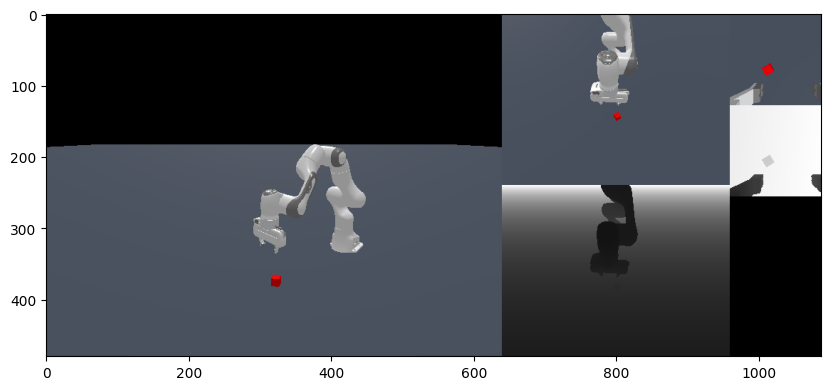

In [2]:
env = gym.make(
    "PickCube-v0",
    camera_cfgs=dict(base_camera=dict(width=320, height=240)),
    render_camera_cfgs=dict(width=640, height=480),
)
plot_img(env.render("cameras"))
env.close()
del env


MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_paranoid=0



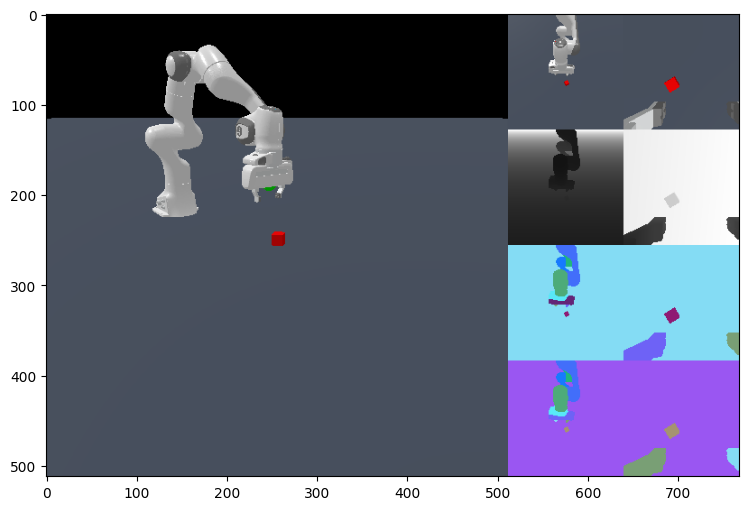

In [3]:
from mani_skill2.utils.sapien_utils import look_at
pose = look_at([1, -1, 0.5], [0, 0, 0])
env = gym.make(
    "PickCube-v0",
    camera_cfgs=dict(texture_names=("Color", "Position", "Segmentation")),
    render_camera_cfgs=dict(p=pose.p, q=pose.q),
)
plot_img(env.render("cameras"))
env.close()
del env

2023-01-17 02:22:18,506 - mani_skill2 - WARNING - Override registered env MyPickCube-v0
[2023-01-17 02:22:18.507] [SAPIEN] [warning] A second engine will share the same internal structures with the first one. Arguments passed to constructor will be ignored.
[2023-01-17 02:22:18.507] [SAPIEN] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.
[2023-01-17 02:22:18.507] [SAPIEN] [warning] Setting renderer more than once should be avoided.


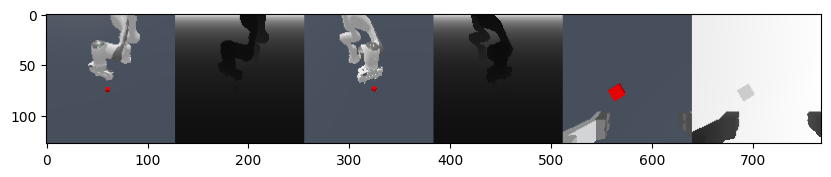

In [4]:
from mani_skill2.envs.pick_and_place.pick_cube import PickCubeEnv
from mani_skill2.sensors.camera import CameraConfig
from mani_skill2.utils.registration import register_env
from mani_skill2.utils.sapien_utils import look_at


@register_env("MyPickCube-v0", max_episode_steps=100, override=True)
class MyPickCubeEnv(PickCubeEnv):
    def _register_cameras(self):
        pose = look_at([0.3, 0.2, 0.6], [-0.1, 0, 0.1])
        left_camera = CameraConfig(
            "left_camera", pose.p, pose.q, 128, 128, np.pi / 2, 0.01, 10
        )

        pose = look_at([0.3, -0.2, 0.6], [-0.1, 0, 0.1])
        right_camera = CameraConfig(
            "right_camera", pose.p, pose.q, 128, 128, np.pi / 2, 0.01, 10
        )
        return [left_camera, right_camera]
    
    def _register_render_cameras(self):
        return []


env = gym.make("MyPickCube-v0")
plot_img(env.render("cameras"))
env.close()
del env

## Add objects and static scenes

2023-01-17 07:11:21,785 - mani_skill2 - WARNING - Override registered env MyPickCube-v1
[2023-01-17 07:11:21.787] [SAPIEN] [warning] A second engine will share the same internal structures with the first one. Arguments passed to constructor will be ignored.
[2023-01-17 07:11:21.787] [SAPIEN] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.
[2023-01-17 07:11:21.787] [SAPIEN] [warning] Setting renderer more than once should be avoided.


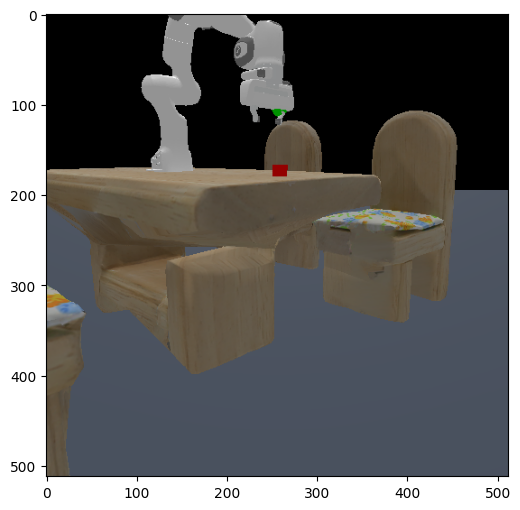

In [23]:
import sapien.core as sapien

from mani_skill2 import ASSET_DIR
from mani_skill2.envs.pick_and_place.pick_cube import PickCubeEnv
from mani_skill2.sensors.camera import CameraConfig
from mani_skill2.utils.registration import register_env
from mani_skill2.utils.sapien_utils import look_at


@register_env("MyPickCube-v1", max_episode_steps=100, override=True)
class MyPickCubeEnvV1(PickCubeEnv):
    def _load_actors(self):
        super()._load_actors()

        builder = self._scene.create_actor_builder()
        path = (
            f"{ASSET_DIR}/google_scanned_objects/DINING_ROOM_CLASSIC/meshes/model.obj"
        )
        scale = [12] * 3
        # scale = [1] * 3
        builder.add_nonconvex_collision_from_file(path, scale=scale)
        builder.add_visual_from_file(path, scale=scale)
        self.arena = builder.build_static()

    def _initialize_actors(self):
        super()._initialize_actors()
        self.obj.set_pose(sapien.Pose(self.obj.pose.p + [0, 0, 0.73], self.obj.pose.q))

    def _initialize_agent(self):
        super()._initialize_agent()
        self.agent.robot.set_pose(sapien.Pose([0, -0.615, 0.73], [0.707, 0, 0, 0.707]))


env = gym.make("MyPickCube-v1")
plot_img(env.render("rgb_array"))
env.close()
del env


2023-01-17 07:11:42,030 - mani_skill2 - WARNING - Override registered env MyPickCube-v1
[2023-01-17 07:11:42.032] [SAPIEN] [warning] A second engine will share the same internal structures with the first one. Arguments passed to constructor will be ignored.
[2023-01-17 07:11:42.032] [SAPIEN] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.
[2023-01-17 07:11:42.032] [SAPIEN] [warning] Setting renderer more than once should be avoided.


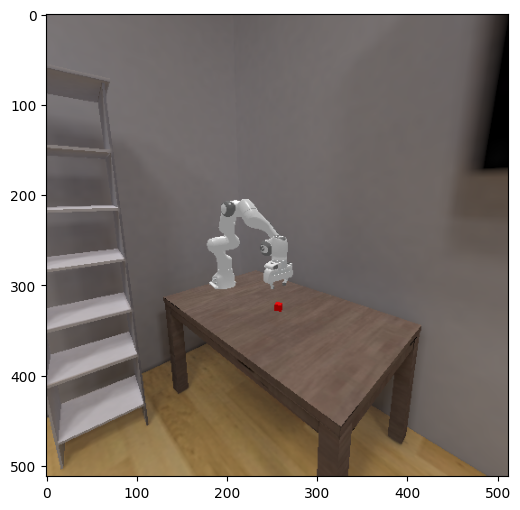

In [25]:
import sapien.core as sapien

from mani_skill2 import ASSET_DIR
from mani_skill2.envs.pick_and_place.pick_cube import PickCubeEnv
from mani_skill2.sensors.camera import CameraConfig
from mani_skill2.utils.registration import register_env
from mani_skill2.utils.sapien_utils import look_at


@register_env("MyPickCube-v1", max_episode_steps=100, override=True)
class MyPickCubeEnvV1(PickCubeEnv):
    def _load_actors(self):
        super()._load_actors()

        builder = self._scene.create_actor_builder()
        # path = (
        #     f"{ASSET_DIR}/google_scanned_objects/DINING_ROOM_CLASSIC/meshes/model.obj"
        # )
        path = f"{ASSET_DIR}/hab2_bench_assets/stages/Baked_sc1_staging_00.glb"
        # scale = [12] * 3
        scale = [1] * 3
        pose = sapien.Pose(q=[0.707, 0.707, 0, 0])
        builder.add_nonconvex_collision_from_file(path, pose, scale=scale)
        builder.add_visual_from_file(path, pose, scale=scale)
        self.arena = builder.build_static()

    def initialize_episode(self):
        super().initialize_episode()
        self.agent.robot.set_pose(sapien.Pose([-2.0616, -3.1837 - 0.56, 0.66467 + 0.095], [0.707, 0, 0, 0.707]))
        self.obj.set_pose(sapien.Pose(self.obj.pose.p + [-2.0616, -3.1837, 0.66467 + 0.095], self.obj.pose.q))
        self.goal_pos = self.goal_pos + [-2.0616, -3.1837, 0.66467+ 0.1]
        self.goal_site.set_pose(sapien.Pose(self.goal_pos))

    def _register_render_cameras(self):
        cam_cfg = super()._register_render_cameras()
        cam_cfg.p = cam_cfg.p + [-2.0616, -3.1837, 0.66467]
        cam_cfg.fov = 1.5
        return cam_cfg

env = gym.make("MyPickCube-v1")
plot_img(env.render("rgb_array"))
env.close()
del env


## Change robots

In [ ]:
from mani_skill2.utils.download_asset import download

download(
    "https://storage1.ucsd.edu/datasets/ManiSkill2022-assets/xmate3_robotiq.zip",
    output_dir="data/tmp",
    target_path="xmate3_robotiq",
)


In [4]:
%cd ../..

/home/jiayuan/projects/ManiSkill2


[2023-01-17 06:03:17.406] [SAPIEN] [warning] A second engine will share the same internal structures with the first one. Arguments passed to constructor will be ignored.
[2023-01-17 06:03:17.406] [SAPIEN] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.
[2023-01-17 06:03:17.406] [SAPIEN] [warning] Setting renderer more than once should be avoided.


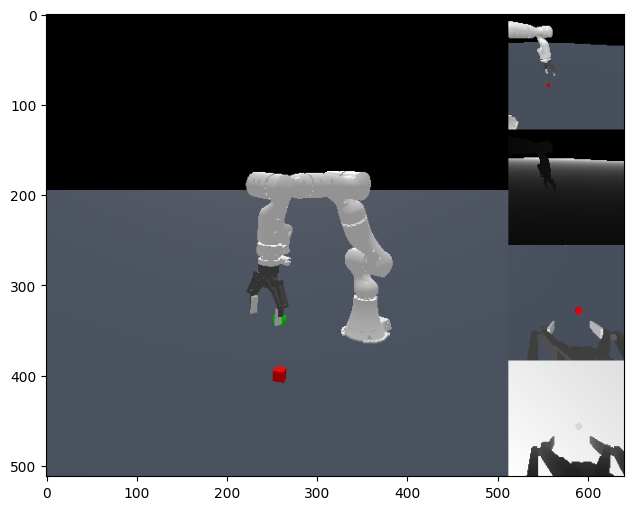

In [5]:
env = gym.make("PickCube-v0", robot="xmate3_robotiq")
plot_img(env.render("cameras"))
env.close()
del env

## Domain randomization

Those will change behaviors so that demo can not be directly applied (but one can use extra random seed to avoid changing the original behavior).

2023-01-17 04:32:13,661 - mani_skill2 - WARNING - Override registered env DR-PickCube-v0
[2023-01-17 04:32:13.662] [SAPIEN] [warning] A second engine will share the same internal structures with the first one. Arguments passed to constructor will be ignored.
[2023-01-17 04:32:13.662] [SAPIEN] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.
[2023-01-17 04:32:13.662] [SAPIEN] [warning] Setting renderer more than once should be avoided.


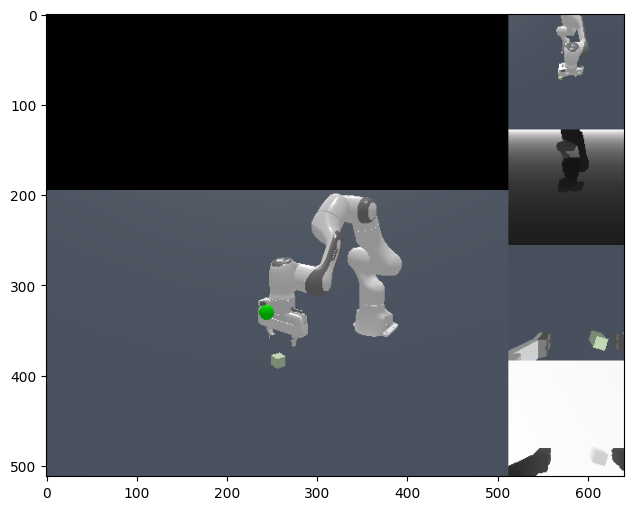

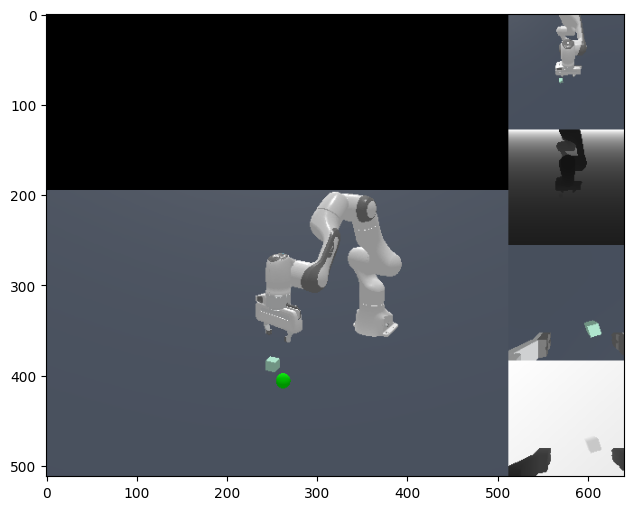

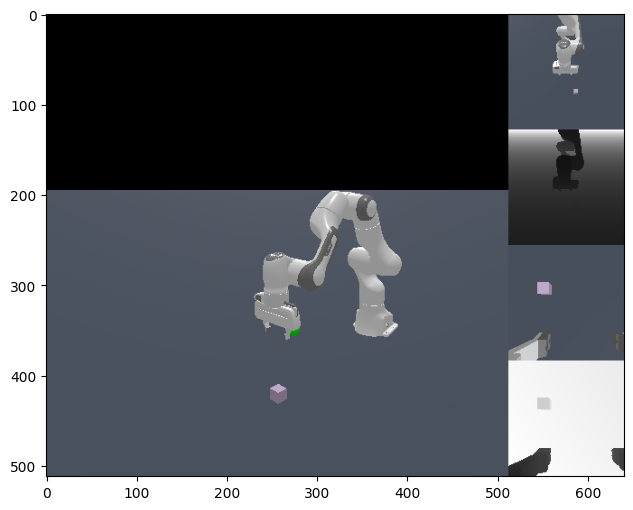

In [13]:
from mani_skill2.envs.pick_and_place.pick_cube import PickCubeEnv
from mani_skill2.sensors.camera import CameraConfig
from mani_skill2.utils.registration import register_env
from mani_skill2.utils.sapien_utils import look_at, set_render_material
import sapien.core as sapien


@register_env("DR-PickCube-v0", max_episode_steps=100, override=True)
class DomainRandomizationPickCubeEnv(PickCubeEnv):
    def _initialize_actors(self):
        super()._initialize_actors()
        friction = self._episode_rng.uniform(0.5, 1.0)
        phys_mtl = self._scene.create_physical_material(
            static_friction=friction, dynamic_friction=friction, restitution=0.1
        )
        for cs in self.obj.get_collision_shapes():
            cs.set_physical_material(phys_mtl)
        linear_damping = self._episode_rng.uniform(0, 1.0)
        angular_damping = self._episode_rng.uniform(0, 1.0)
        self.obj.set_damping(linear_damping, angular_damping)
        color = self._episode_rng.uniform(0.5, 1.0, size=3)
        for vb in self.obj.get_visual_bodies():
            for rs in vb.get_render_shapes():
                set_render_material(rs.material, color=np.hstack([color, 1.0]))


env = gym.make("DR-PickCube-v0")
for _ in range(3):
    env.reset()
    plot_img(env.render("cameras"))
env.close()
del env

[2023-01-17 04:36:56.672] [SAPIEN] [warning] A second engine will share the same internal structures with the first one. Arguments passed to constructor will be ignored.
[2023-01-17 04:36:56.672] [SAPIEN] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.
[2023-01-17 04:36:56.672] [SAPIEN] [warning] Setting renderer more than once should be avoided.


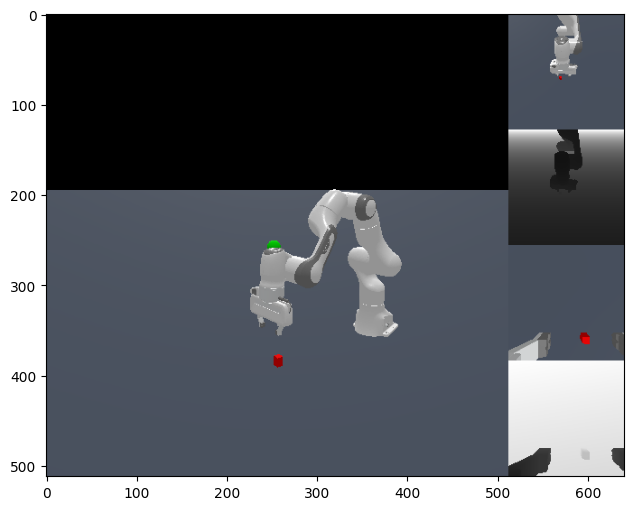

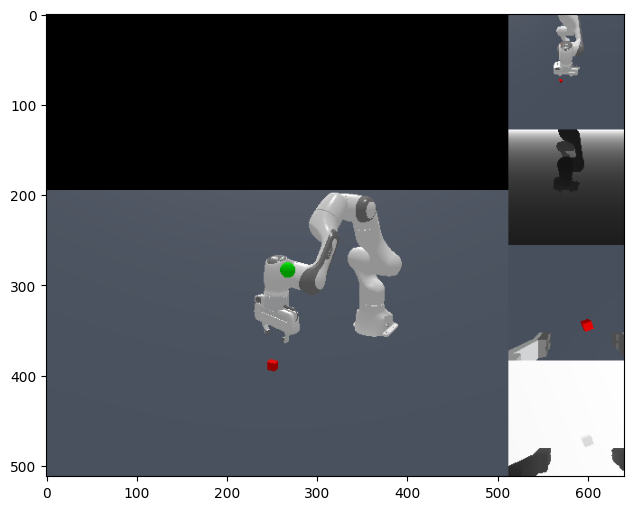

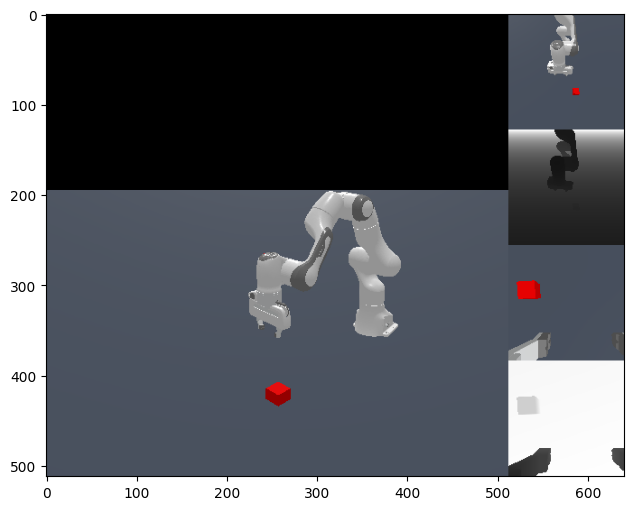

In [14]:
from mani_skill2.envs.pick_and_place.pick_cube import PickCubeEnv
from mani_skill2.sensors.camera import CameraConfig
from mani_skill2.utils.registration import register_env
from mani_skill2.utils.sapien_utils import look_at, set_render_material
import sapien.core as sapien


@register_env("DR-PickCube-v1", max_episode_steps=100, override=True)
class DomainRandomizationPickCubeEnvV1(PickCubeEnv):
    # Reconfigure the environment when reset by default
    def reset(self, seed=None, reconfigure=True):
        return super().reset(seed, reconfigure)

    def _load_actors(self):
        self.cube_half_size = self._episode_rng.uniform(0.01, 0.03, size=3)
        super()._load_actors()


env = gym.make("DR-PickCube-v1")
for _ in range(3):
    env.reset()
    plot_img(env.render("cameras"))
env.close()
del env

## Enable shadows

MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_paranoid=0



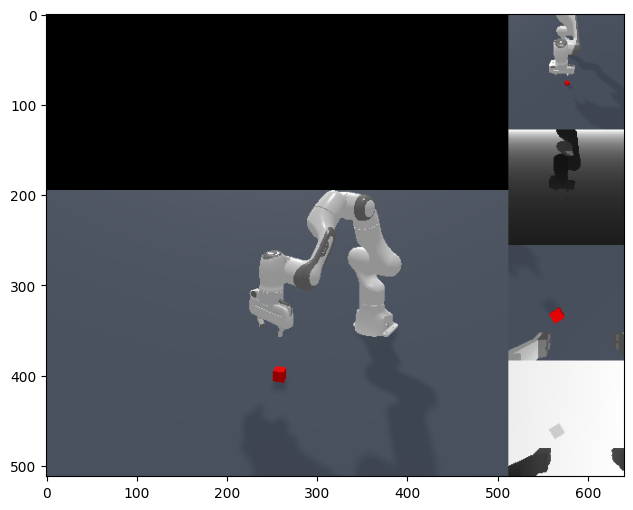

In [8]:
env = gym.make(
    "PickCube-v0",
    enable_shadow=True
)
plot_img(env.render("cameras"))
env.close()
del env
